## Configuração e Customização Avançada do Matplotlib

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
%matplotlib inline
mpl.__version__

'3.0.3'

In [2]:
print(plt.style.available) #estilos disponíveis no matplot

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [3]:
def cria_plot ():
    x = np.random.randn(5000, 6)
    (figure, axes) = plt.subplots(figsize = (16,10))
    (n, bins, patches) = axes.hist(x, 12, 
                                   density = 1, 
                                   histtype = 'bar',
                                   label = ['Color 1', 'Color 2', 'Color 3', 'Color 4', 'Color 5', 'Color 6'])
    axes.set_title("Histograma\nPara\nDistribuição Normal", fontsize = 25)
    axes.set_xlabel("Dados", fontsize = 16)
    axes.set_ylabel("Frequência", fontsize = 16)
    axes.legend()
    plt.show()

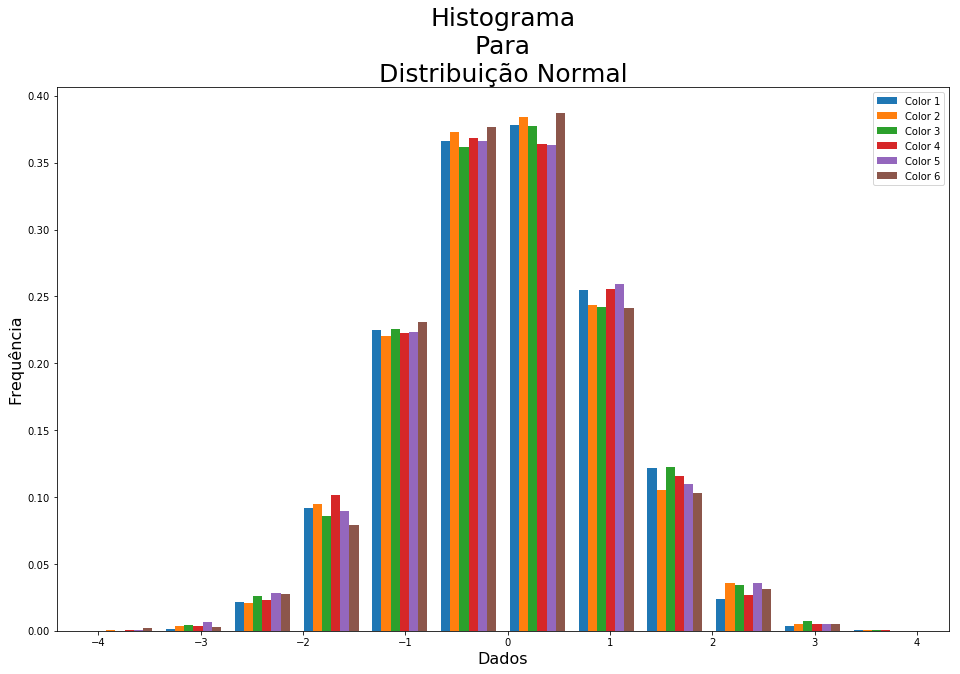

In [4]:
cria_plot()

In [5]:
# Usuários Windows utilizem: 
!dir estilos
#!ls -l estilos

 O volume na unidade C nÆo tem nome.
 O N£mero de S‚rie do Volume ‚ 0A50-70D1

 Pasta de C:\Python\BigData_Spark_Python\Cap03\estilos

02/01/2020  00:40    <DIR>          .
02/01/2020  00:40    <DIR>          ..
26/03/2019  23:24               592 personalestilo-1.mplstyle
26/03/2019  23:24               592 personalestilo-2.mplstyle
               2 arquivo(s)          1.184 bytes
               2 pasta(s)   427.600.744.448 bytes dispon¡veis


In [22]:
# Usuários Windows utilizem: 
 !type estilos/personalestilo-1.mplstyle
#!cat estilos/personalestilo-1.mplstyle

IndentationError: unexpected indent (<ipython-input-22-790304fa4542>, line 2)

In [20]:
plt.style.use("estilos/personalestilo-1.mplstyle")

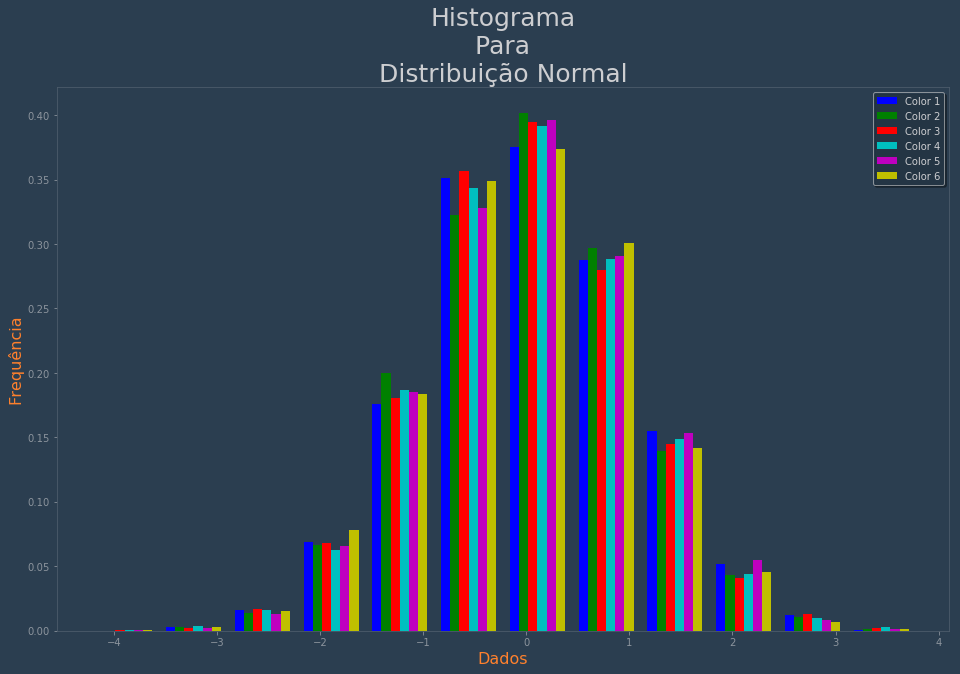

In [21]:
cria_plot()

### Subplots

Utilizaremos o dataset sobre automóveis do repositório de Machine Learning da UCI: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.html)

[Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/Automobile)


## Usando o Pandas para Carregar os Dados

In [23]:
import sys
sys.path.append("lib")
import geradados, geraplot, radar

In [24]:
dados = geradados.get_raw_data()
dados.head()

,riskiness,losses,make,fuel type,aspiration,doors,body,drive,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [25]:
dados_subset = geradados.get_limited_data()
dados_subset.head()

,make,price,city mpg,highway mpg,horsepower,weight,riskiness,losses
0,audi,13950,24,30,102,2337,2,164
1,audi,17450,18,22,115,2824,2,164
2,audi,17710,19,25,110,2844,1,158
3,audi,23875,17,20,140,3086,1,158
4,bmw,16430,23,29,101,2395,2,192


In [26]:
geradados.get_all_auto_makes()

array(['audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'jaguar', 'mazda',
       'mercedes-benz', 'mitsubishi', 'nissan', 'peugot', 'plymouth',
       'porsche', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [27]:
(fabricantes, total) = geradados.get_make_counts(dados_subset)
total

[('audi', 4),
 ('bmw', 4),
 ('chevrolet', 3),
 ('dodge', 8),
 ('honda', 13),
 ('jaguar', 1),
 ('mazda', 11),
 ('mercedes-benz', 5),
 ('mitsubishi', 10),
 ('nissan', 18),
 ('peugot', 7),
 ('plymouth', 6),
 ('porsche', 1),
 ('saab', 6),
 ('subaru', 12),
 ('toyota', 31),
 ('volkswagen', 8),
 ('volvo', 11)]

In [28]:
dados = geradados.get_limited_data(lower_bound = 6)
dados.head()

,make,price,city mpg,highway mpg,horsepower,weight,riskiness,losses
11,dodge,5572,37,41,68,1876,1,118
12,dodge,6377,31,38,68,1876,1,118
13,dodge,7957,24,30,102,2128,1,118
14,dodge,6229,31,38,68,1967,1,148
15,dodge,6692,31,38,68,1989,1,148


In [30]:
dados.tail()

,make,price,city mpg,highway mpg,horsepower,weight,riskiness,losses
154,volvo,16845,23,28,114,2952,-1,95
155,volvo,19045,19,25,160,3049,-1,95
156,volvo,21485,18,23,134,3012,-1,95
157,volvo,22470,26,27,106,3217,-1,95
158,volvo,22625,19,25,114,3062,-1,95


In [31]:
dados


,make,price,city mpg,highway mpg,horsepower,weight,riskiness,losses
11,dodge,5572,37,41,68,1876,1,118
12,dodge,6377,31,38,68,1876,1,118
13,dodge,7957,24,30,102,2128,1,118
14,dodge,6229,31,38,68,1967,1,148
15,dodge,6692,31,38,68,1989,1,148
16,dodge,7609,31,38,68,1989,1,148
17,dodge,8921,24,30,88,2535,-1,110
18,dodge,12964,19,24,145,2811,3,145
19,honda,6479,49,54,58,1713,2,137
20,honda,6855,31,38,76,1819,2,137


In [29]:
len(dados.index)

141

In [32]:
dados_subset

,make,price,city mpg,highway mpg,horsepower,weight,riskiness,losses
0,audi,13950,24,30,102,2337,2,164
1,audi,17450,18,22,115,2824,2,164
2,audi,17710,19,25,110,2844,1,158
3,audi,23875,17,20,140,3086,1,158
4,bmw,16430,23,29,101,2395,2,192
5,bmw,16925,23,29,101,2395,0,192
6,bmw,20970,21,28,121,2710,0,188
7,bmw,21105,21,28,121,2765,0,188
8,chevrolet,5151,47,53,48,1488,2,121
9,chevrolet,6295,38,43,70,1874,1,98


In [33]:
len(dados_subset.index)

159

In [34]:
dados_subset.head()

,make,price,city mpg,highway mpg,horsepower,weight,riskiness,losses
0,audi,13950,24,30,102,2337,2,164
1,audi,17450,18,22,115,2824,2,164
2,audi,17710,19,25,110,2844,1,158
3,audi,23875,17,20,140,3086,1,158
4,bmw,16430,23,29,101,2395,2,192


## Normalizando os Dados

In [35]:
dados_normalizados = dados.copy()
dados_normalizados.rename(columns = {"horsepower": "power"}, inplace = True)

In [36]:
dados_normalizados.head()

,make,price,city mpg,highway mpg,power,weight,riskiness,losses
11,dodge,5572,37,41,68,1876,1,118
12,dodge,6377,31,38,68,1876,1,118
13,dodge,7957,24,30,102,2128,1,118
14,dodge,6229,31,38,68,1967,1,148
15,dodge,6692,31,38,68,1989,1,148


In [37]:
# Valores mais altos para estas variáveis
geradados.norm_columns(["city mpg", "highway mpg", "power"], dados_normalizados)
dados_normalizados.head()

,make,price,city mpg,highway mpg,power,weight,riskiness,losses
11,dodge,5572,0.62500,0.59375,0.108108,1876,1,118
12,dodge,6377,0.43750,0.50000,0.108108,1876,1,118
13,dodge,7957,0.21875,0.25000,0.337838,2128,1,118
14,dodge,6229,0.43750,0.50000,0.108108,1967,1,148
15,dodge,6692,0.43750,0.50000,0.108108,1989,1,148


In [38]:
# Valores mais baixos para estas variáveis
geradados.invert_norm_columns(["price", "weight", "riskiness", "losses"], dados_normalizados)
dados_normalizados.head()

,make,price,city mpg,highway mpg,power,weight,riskiness,losses
11,dodge,0.974068,0.62500,0.59375,0.108108,0.897031,0.4,0.722513
12,dodge,0.928086,0.43750,0.50000,0.108108,0.897031,0.4,0.722513
13,dodge,0.837836,0.21875,0.25000,0.337838,0.737840,0.4,0.722513
14,dodge,0.936540,0.43750,0.50000,0.108108,0.839545,0.4,0.565445
15,dodge,0.910093,0.43750,0.50000,0.108108,0.825648,0.4,0.565445


## Plots

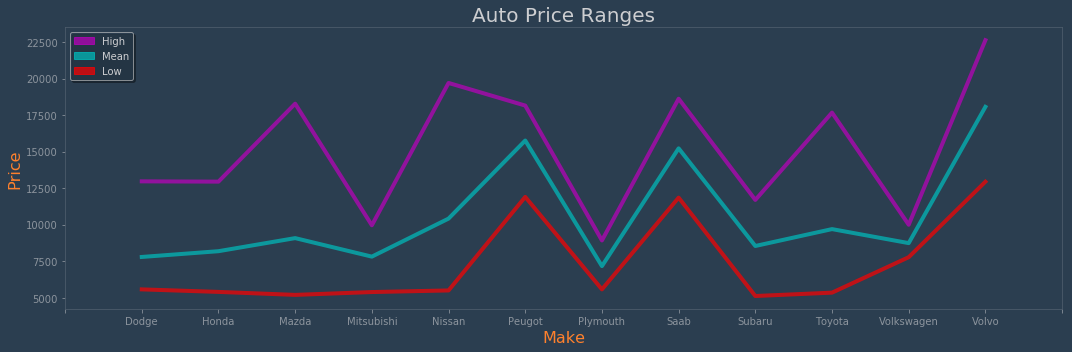

In [39]:
figure = plt.figure(figsize = (15, 5))
prices_gs = mpl.gridspec.GridSpec(1, 1)
prices_axes = geraplot.make_autos_price_plot(figure, prices_gs, dados)
plt.show()

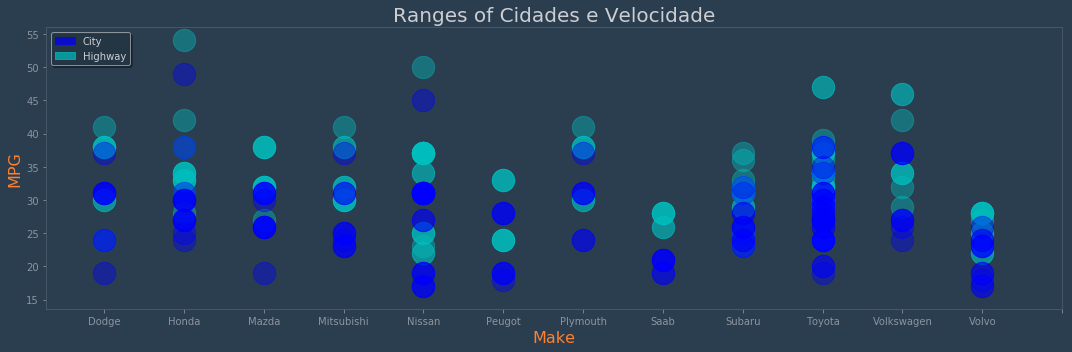

In [40]:
figure = plt.figure(figsize = (15, 5))
mpg_gs = mpl.gridspec.GridSpec(1, 1)
mpg_axes = geraplot.make_autos_mpg_plot(figure, mpg_gs, dados)
plt.show()

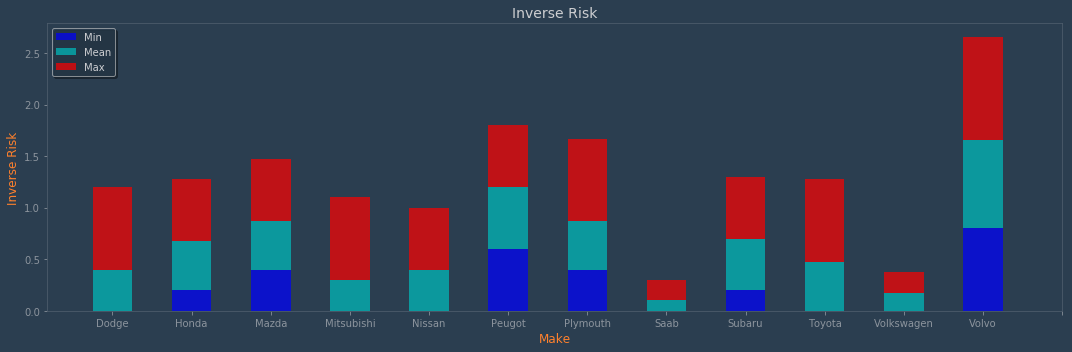

In [41]:
figure = plt.figure(figsize = (15, 5))
risk_gs = mpl.gridspec.GridSpec(1, 1)
risk_axes = geraplot.make_autos_riskiness_plot(figure, risk_gs, dados_normalizados)
plt.show()

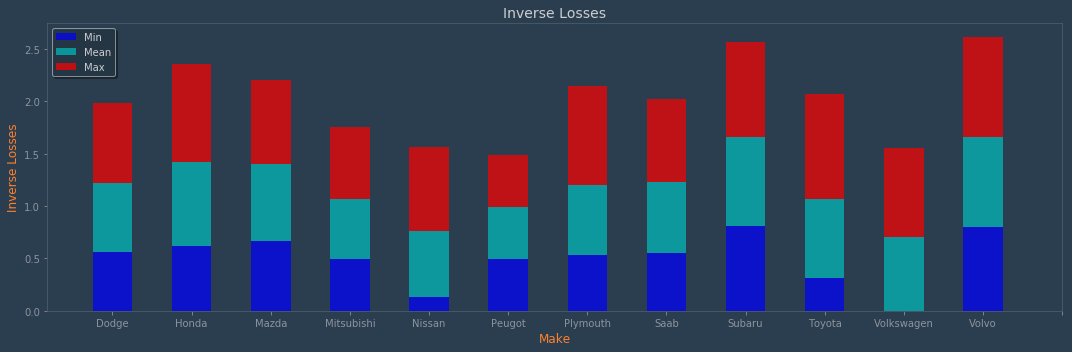

In [42]:
figure = plt.figure(figsize=(15, 5))
loss_gs = mpl.gridspec.GridSpec(1, 1)
loss_axes = geraplot.make_autos_losses_plot(figure, loss_gs, dados_normalizados)
plt.show()

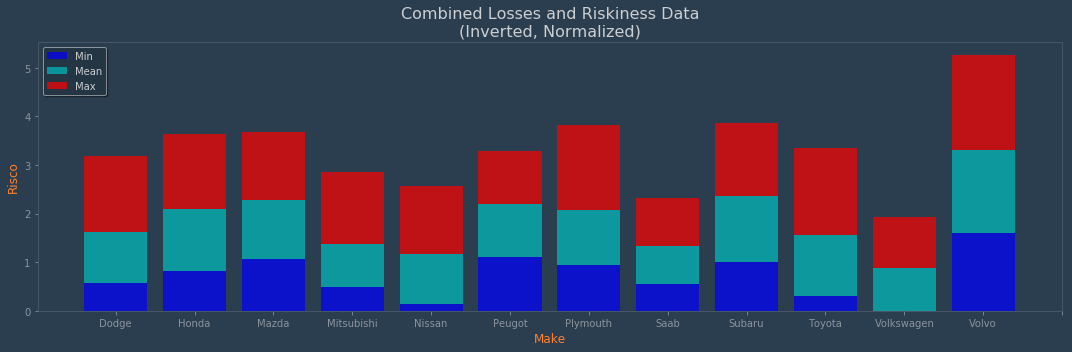

In [43]:
figure = plt.figure(figsize = (15, 5))
risk_loss_gs = mpl.gridspec.GridSpec(1, 1)
risk_loss_axes = geraplot.make_autos_loss_and_risk_plot(figure, risk_loss_gs, dados_normalizados)
plt.show()

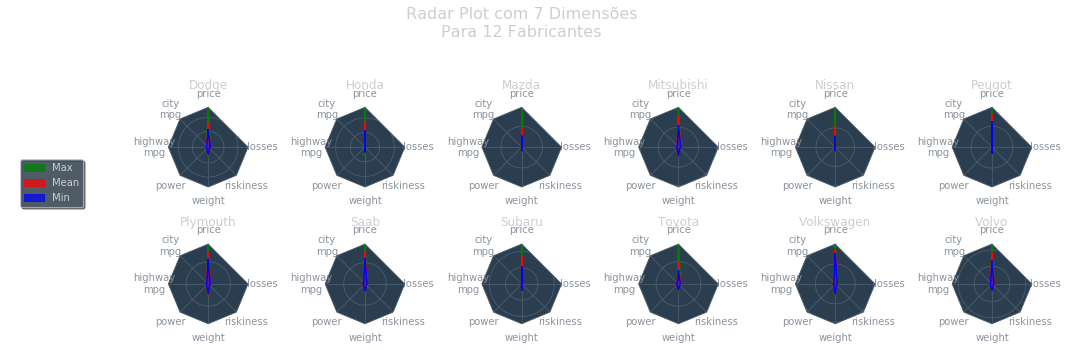

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
import warnings
#warnings.filterwarnings('ignore')
import matplotlib
%matplotlib inline
import sys
sys.path.append("lib")
import geradados, geraplot, radar
#plt.style.use("estilos/personalestilo-1.mplstyle")

dados = geradados.get_raw_data()
dados.head()
dados_subset = geradados.get_limited_data()
dados_subset.head()
dados = geradados.get_limited_data(lower_bound = 6)
dados.head()
dados_normalizados = dados.copy()
dados_normalizados.rename(columns = {"horsepower": "power"}, inplace = True)
figure = plt.figure(figsize = (15, 5))

radar_gs = mpl.gridspec.GridSpec(3, 7, 
                                 height_ratios = [1, 10, 10], 
                                 wspace = 0.50, 
                                 hspace = 0.60, 
                                 top = 0.95, 
                                 bottom = 0.25)
radar_axes = geraplot.make_autos_radar_plot(figure, gs=radar_gs, pddata=dados_normalizados)
plt.show()

## Plots Combinados

wireframe

```
--------------------------------------------
|               overall title              |
--------------------------------------------
|               price ranges               |
--------------------------------------------
| combined loss/risk |                     |
|                    |        radar        |
----------------------        plots        |
|  risk   |   loss   |                     |
--------------------------------------------
|                   mpg                    |
--------------------------------------------
```

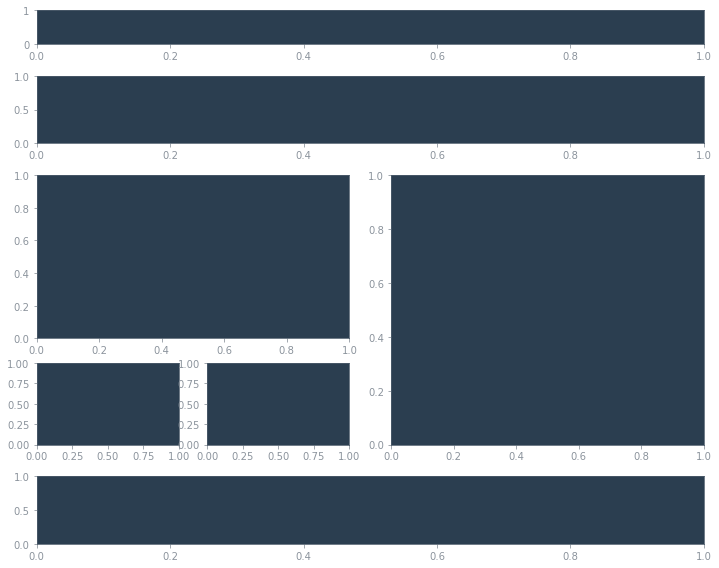

In [45]:
# Construindo as camadas (sem os dados)
figure = plt.figure(figsize=(10, 8))
gs_master = mpl.gridspec.GridSpec(4, 2, height_ratios=[1, 2, 8, 2])

# Camada 1 - Title
gs_1 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[0, :])
title_axes = figure.add_subplot(gs_1[0])

# Camada 2 - Price
gs_2 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[1, :])
price_axes = figure.add_subplot(gs_2[0])

# Camada 3 - Risks & Radar
gs_31 = mpl.gridspec.GridSpecFromSubplotSpec(2, 2, height_ratios=[2, 1], subplot_spec=gs_master[2, :1])
risk_and_loss_axes = figure.add_subplot(gs_31[0, :])
risk_axes = figure.add_subplot(gs_31[1, :1])
loss_axes = figure.add_subplot(gs_31[1:, 1])
gs_32 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[2, 1])
radar_axes = figure.add_subplot(gs_32[0])

# Camada 4 - MPG
gs_4 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[3, :])
mpg_axes = figure.add_subplot(gs_4[0])

# Une as camas, ainda sem dados
gs_master.tight_layout(figure)
plt.show()

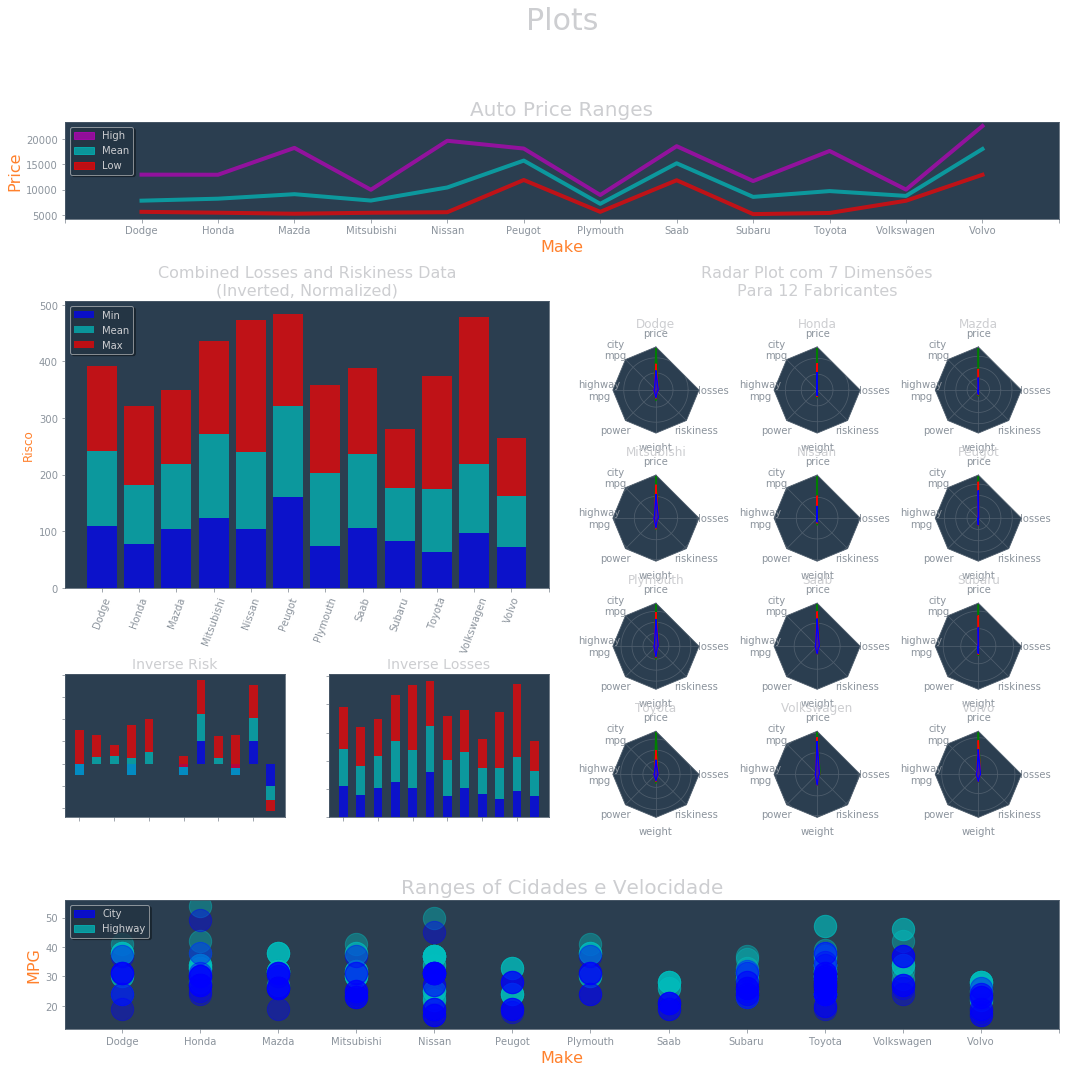

In [46]:
# Construindo as camadas (com os dados)
figure = plt.figure(figsize = (15, 15))
gs_master = mpl.gridspec.GridSpec(4, 2, 
                                  height_ratios = [1, 24, 128, 32], 
                                  hspace = 0, 
                                  wspace = 0)

# Camada 1 - Title
gs_1 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs_master[0, :])
title_axes = figure.add_subplot(gs_1[0])
title_axes.set_title("Plots", fontsize = 30, color = "#cdced1")
geraplot.hide_axes(title_axes)

# Camada 2 - Price
gs_2 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs_master[1, :])
price_axes = figure.add_subplot(gs_2[0])
geraplot.make_autos_price_plot(figure, 
                               pddata = dados, 
                               axes = price_axes)

# Camada 3, Part I - Risks
gs_31 = mpl.gridspec.GridSpecFromSubplotSpec(2, 2, 
                                             height_ratios = [2, 1], 
                                             hspace = 0.4, 
                                             subplot_spec = gs_master[2, :1])
risk_and_loss_axes = figure.add_subplot(gs_31[0, :])
geraplot.make_autos_loss_and_risk_plot(figure, 
                                       pddata = dados_normalizados, 
                                       axes = risk_and_loss_axes, 
                                       x_label = False, 
                                       rotate_ticks = True)
risk_axes = figure.add_subplot(gs_31[1, :1])
geraplot.make_autos_riskiness_plot(figure, 
                                   pddata = dados_normalizados, 
                                   axes = risk_axes, 
                                   legend = False, 
                                   labels = False)
loss_axes = figure.add_subplot(gs_31[1:, 1])
geraplot.make_autos_losses_plot(figure, 
                                pddata = dados_normalizados, 
                                axes = loss_axes, 
                                legend = False, 
                                labels = False)

# Camada 3, Part II - Radar
gs_32 = mpl.gridspec.GridSpecFromSubplotSpec(5, 3, 
                                             height_ratios = [1, 20, 20, 20, 20], 
                                             hspace = 0.6, 
                                             wspace = 0, 
                                             subplot_spec = gs_master[2, 1])
(rows, cols) = geometry = gs_32.get_geometry()
title_axes = figure.add_subplot(gs_32[0, :])
inner_axes = []
projection = radar.RadarAxes(spoke_count = len(dados_normalizados.groupby("make").mean().columns))
[inner_axes.append(figure.add_subplot(m, projection = projection)) for m in [n for n in gs_32][cols:]]
geraplot.make_autos_radar_plot(figure, 
                               pddata = dados_normalizados, 
                               title_axes = title_axes, 
                               inner_axes = inner_axes, 
                               legend_axes = False, 
                               geometry = geometry)

# Camada 4 - MPG
gs_4 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs_master[3, :])
mpg_axes = figure.add_subplot(gs_4[0])
geraplot.make_autos_mpg_plot(figure, 
                             pddata = dados, 
                             axes = mpg_axes)

# Unindo as camadas
gs_master.tight_layout(figure)
plt.show()

# Fim